In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# returns a dataframe with the frequency of digits 0-9 from given list of nums
def get_frequencies(nums):
    freqs_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    for num in nums:
        if not pd.isna(num):
            freqs_list[num] += 1
    freqs_df = pd.DataFrame(freqs_list, index=range(0, 10), columns=['freq'])

    return freqs_df

#returns the first digit after the decimal point
def first_after_decimal(num):
    if pd.isna(num):
        return
    if num == 0:
        return
    else:
        num = float(num) * 10000000
        return(first_digit(abs(num)))
#     return(first_digit(abs(num)))
#     return int((abs(float(num)) * 10) % 10)

In [259]:
def first_digit(num):
    if pd.isna(num):
        return
    v = str(num)[0]
    if v == '.':
        return
#     print(int(str(num)))
    return int(str(num)[0])

In [260]:
all_files = ["Data/47.csv"] # "Data/47.csv", "Data/48.csv" #run each of the three files one at a time


In [261]:
df2 = pd.DataFrame(index=range(0, 10))

i = 1
std_devs = {}

for file in all_files:
    print(i)
    i += 1
    data = pd.read_csv(file, na_values=['-', 'ND'], header=[0])
    last_digits = [] #
    last_digit_dict = {}
    last_digit_freq = {}

    for column in data:
        nums = data[column]
        last_digit = [first_after_decimal(num) for num in nums]
        #last_digit = [first_digit(num) for num in nums]
        last_digits += last_digit
        last_digit_dict[column] = last_digit
        

    df1 = get_frequencies(last_digits)
    
    column_data = {}
    keys = []
    

    for key in last_digit_dict.keys():
        frequencies = get_frequencies(last_digit_dict[key])
        frequencies['Percentage'] = frequencies['freq'] / sum(frequencies['freq']) * 100
        last_digit_freq[key] = frequencies

        message = (f"{key}"
        f"{frequencies}"
        f"")
        #print(message)
        
        column_data[key] = frequencies['Percentage']
        keys.append(key)
 

    
    df5 = pd.DataFrame(column_data)
    #df5['Average'] = df1['freq'] / sum(df1['freq']) * 100
    print(df5)
    df5 = df5.drop([0])
    
    std_devs[file] = df5.std(axis = 1)
        
    df1['Percentage'] = df1['freq'] / sum(df1['freq']) * 100
    df2[file] = df1['freq'] / sum(df1['freq']) * 100
    print(df2)


1
   Intensity  Intensity LEIBR  Intensity LEIDO  Intensity LEIIN  \
0   0.000000         0.000000         0.000000         0.000000   
1  27.485929        30.686406        33.564815        29.155673   
2  20.168856        18.304172        16.319444        16.886544   
3  12.711069        12.247645        10.879630        11.609499   
4   8.818011         9.017497        10.995370         8.707124   
5   8.442777         7.671602         7.175926         9.234828   
6   5.816135         6.325707         6.018519         6.332454   
7   6.097561         6.325707         6.944444         7.651715   
8   5.769231         5.652759         5.092593         5.145119   
9   4.690432         3.768506         3.009259         5.277045   

   Intensity LEIAM  Intensity LEIMA  Intensity LEITA  Intensity LEITR  
0         0.000000         0.000000         0.000000         0.000000  
1        25.566343        31.207289        29.337094        32.374101  
2        14.239482        17.198178        2

            level_0  Digit  percentage
0         Intensity      1   27.485929
1         Intensity      2   20.168856
2         Intensity      3   12.711069
3         Intensity      4    8.818011
4         Intensity      5    8.442777
..              ...    ...         ...
67  Intensity LEITR      5    8.453237
68  Intensity LEITR      6    6.294964
69  Intensity LEITR      7    6.654676
70  Intensity LEITR      8    7.194245
71  Intensity LEITR      9    2.697842

[72 rows x 3 columns]


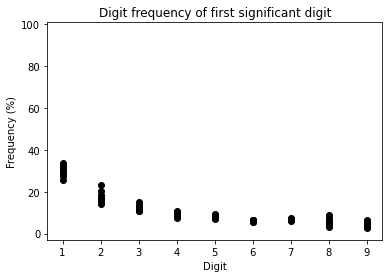

In [262]:
df6 = pd.DataFrame(df5).T.stack().reset_index()#.drop(columns=['level_1'])
df6 = df6.rename(columns={0: "percentage", "level_1": "Digit"})
print(df6)

plt.scatter(x = 'Digit', y = 'percentage', data = df6, color = 'black')
# plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.ylim(-3, 101)
plt.ylabel("Frequency (%)")
plt.xlabel("Digit")
plt.title("Digit frequency of first significant digit")
plt.savefig('Data/fig1a', dpi=300)
plt.show()

In [263]:
# df6 = df6.astype({'Digit': str})

# df6 = pd.pivot_table(df6, values = 'percentage', index = 'level_0', columns = 'Digit').reset_index()
# print(df6)

In [251]:
# plt.boxplot(df7, sym="k.", medianprops=dict(color="black"))
# plt.xticks([0,1,2,3,4,5,6,7,8,9])
# plt.ylim(-1, 40)
# plt.ylabel("Standard Deviation")
# plt.xlabel("Digit")
# plt.title("Standard deviation of digit frequency of first significant digit")
# plt.savefig('Data/fig1a', dpi=300)
# plt.show()

In [252]:
# PCA analysis of digit frequencies
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA

# features = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
# print(features)

# Separating out the features
# x = df6.loc[:, features].values
# # Separating out the target
# y = df6.loc[:,['level_0']].values
# # # Standardizing the features

# x = StandardScaler().fit_transform(x)
# print(x)

# pca = PCA(n_components=2)
# principalComponents = pca.fit_transform(x)
# principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# finalDf = pd.concat([principalDf, df6[['level_0']]], axis = 1)
# print(finalDf)

In [257]:
# a PCA plot of the digit frequencies
# fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(1,1,1) 
# ax.set_xlabel('Principal Component 1', fontsize = 15)
# ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_title('47', fontsize = 20)

# targets = keys
# for target in targets:
#    indicesToKeep = finalDf['level_0'] == target
#    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
#               , finalDf.loc[indicesToKeep, 'principal component 2']
#               , s = 50)
# ax.legend(targets)
# ax.grid()